In [1]:
import os
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

color = "#9a3324"
fpath_concat = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/SPT_results_AIO_concat-0Dex_noTR_0hr.csv"


threshold_max_d_anytwo_nm = 200  # unit: um
df_all = pd.read_csv(fpath_concat)
os.chdir(dirname(fpath_concat))

## calculate error bounds
- D formula with errors (MSD: um^2, t: s, D: um^2/s, n: dimension, R: motion blur coefficient; doi:10.1103/PhysRevE.85.061916)
- diffusion dimension = 2. Note: This is the dimension of the measured data, not the actual movements! Although particles are doing 3D diffussion, the microscopy data is a projection on 2D plane and thus should be treated as 2D diffusion!
- MSD = 2 n D tau + 2 n sigma^2 - 4 n R D tau, n=2, R=1/6
- MSD = (4D - 8/6 D) tau + 4 sigma^2
- MSD = 8/3 D tau + 4 sigma^2

In [2]:
s_per_frame = 0.02
localization_error = df_all[df_all['linear_fit_R2']>0.7]["linear_fit_sigma"].mean() / 1000
um_per_pxl = 0.117
link_max = 3
log10D_low = np.log10((localization_error**2) / ((8 / 3) * (s_per_frame)))
log10D_high = np.log10(((um_per_pxl * link_max) ** 2) / ((8 / 3) * (s_per_frame)))

# Plots

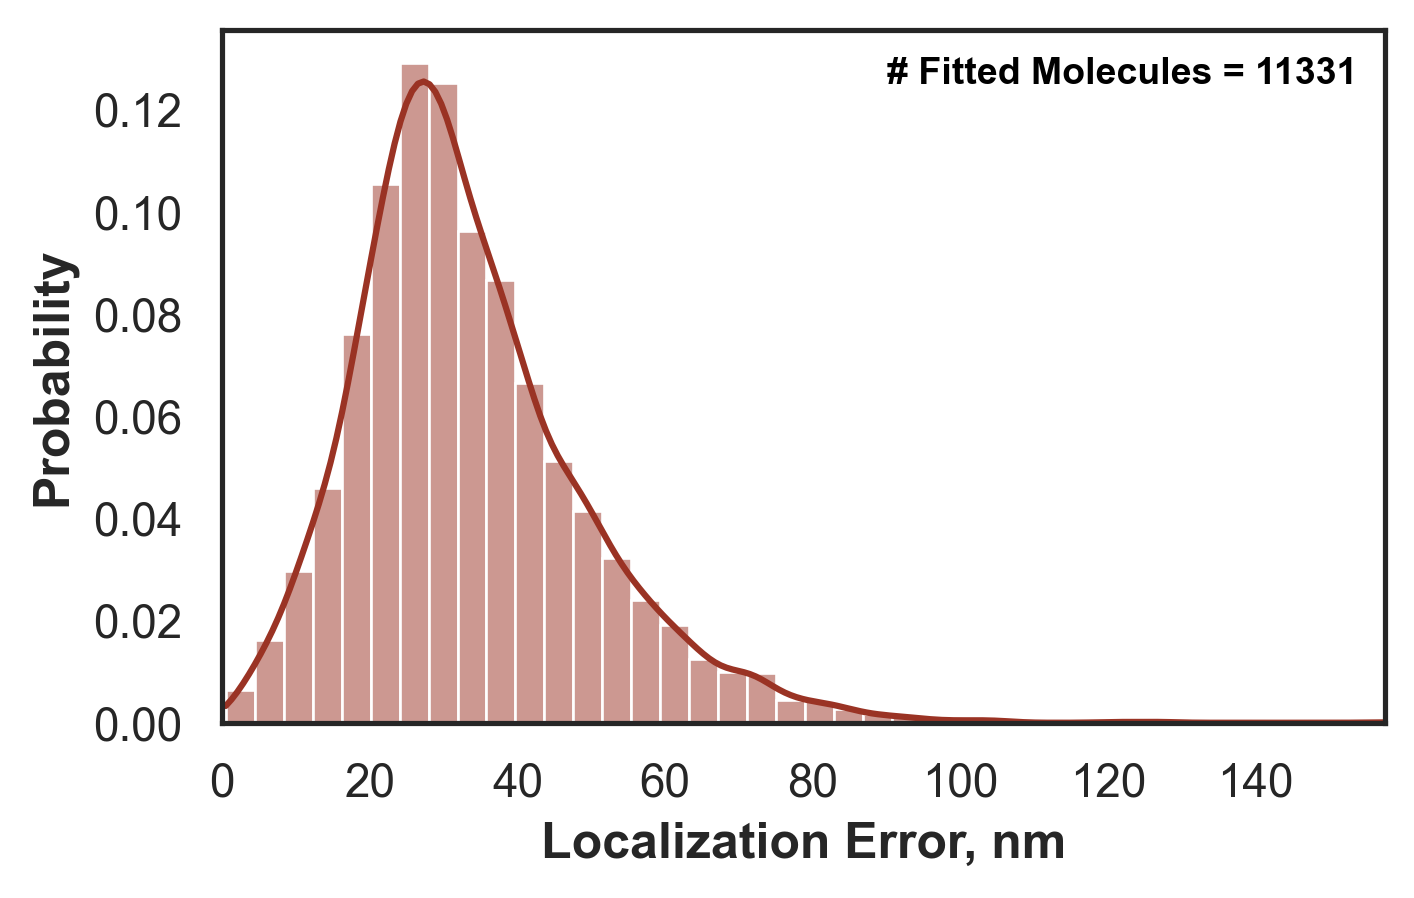

In [3]:
# Localization error
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["linear_fit_R2"] > 0.7]
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_sigma",
    bins=40,
    stat="probability",
    color=color,
    kde=True,
    lw=3,
)
plt.text(
    90,
    0.125,
    "# Fitted Molecules = " + str(data.shape[0]),
    weight="bold",
    color="black",
    fontsize=9,
)
plt.axvline(threshold_max_d_anytwo_nm, ls="--", color="dimgray", alpha=0.7)
plt.xlim(0, df_all["linear_fit_sigma"].max())
plt.xlabel("Localization Error, nm", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("1.LocError_histo.png", format="png", bbox_inches="tight")
plt.show()

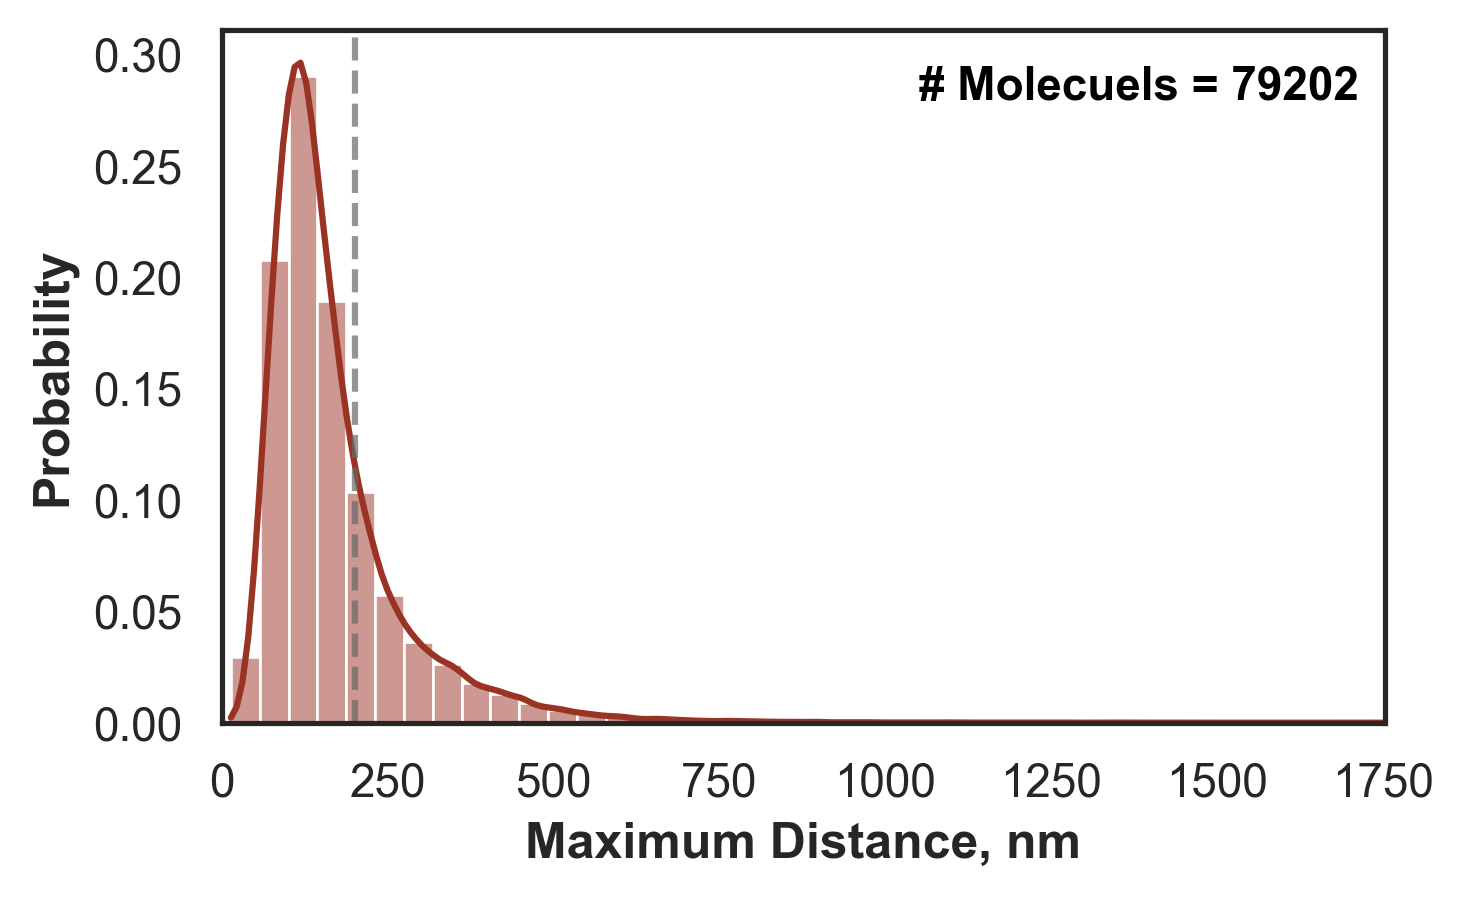

In [4]:
# Maximum Distance (whether static molecule)
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=df_all,
    x="max_d_anytwo_nm",
    bins=40,
    stat="probability",
    color=color,
    kde=True,
    lw=3,
)
plt.axvline(threshold_max_d_anytwo_nm, ls="--", color="dimgray", alpha=0.7)
plt.text(
    1050,
    0.28,
    "# Molecuels = " + str(df_all.shape[0]),
    weight="bold",
    fontsize=11,
    color="black",
)
plt.xlim(0, df_all["max_d_anytwo_nm"].max())
plt.xlabel("Maximum Distance, nm", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("2.max_d_anytwo_nm_histo.png", format="png", bbox_inches="tight")
plt.show()

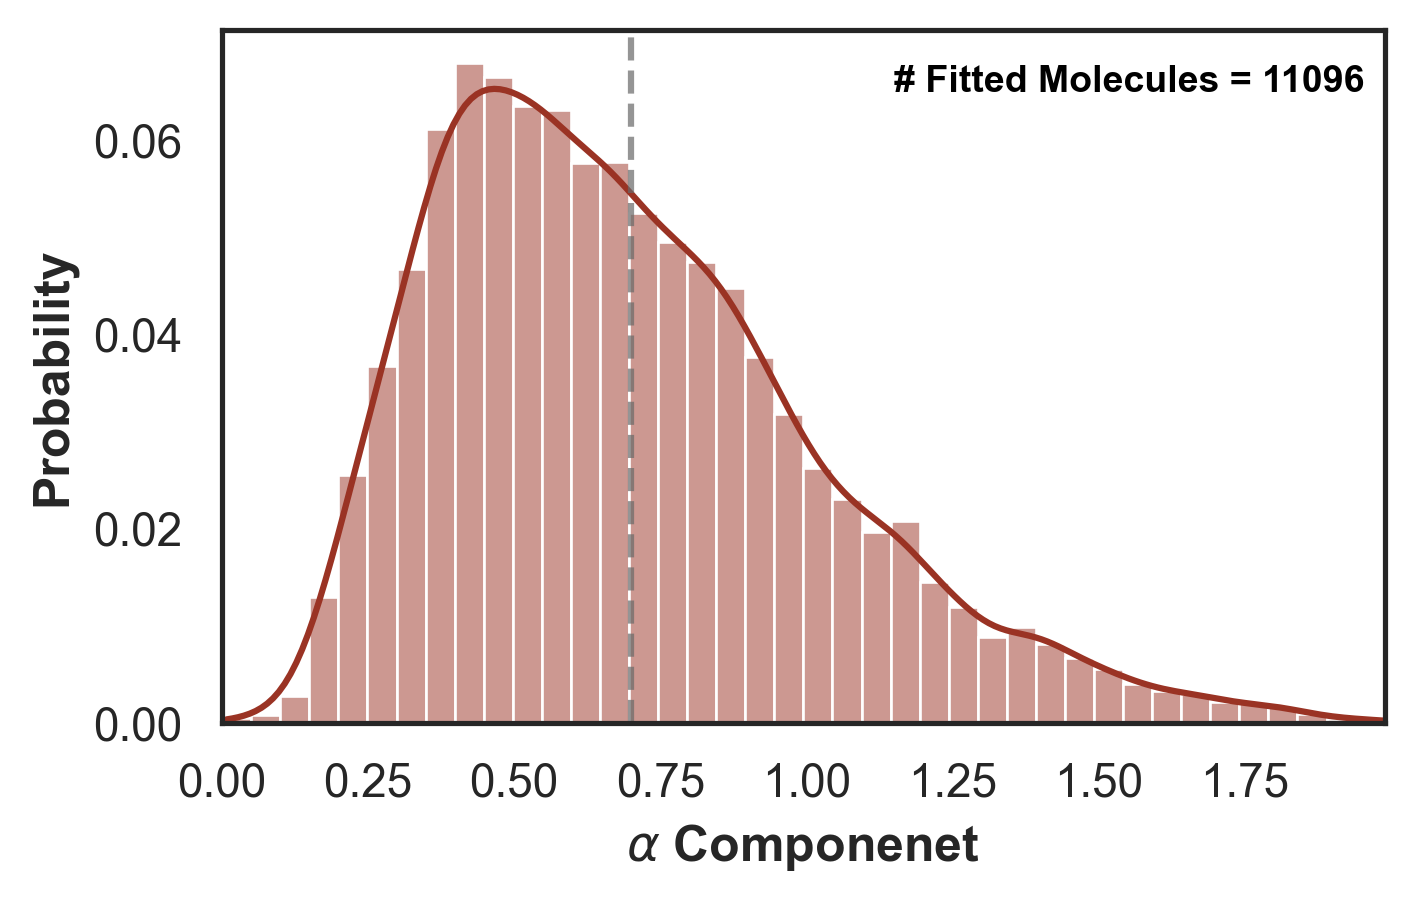

In [5]:
# alpha distribution
plt.figure(figsize=(5, 3), dpi=300)
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["loglog_fit_R2"] > 0.7]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    bins=40,
    stat="probability",
    color=color,
    binrange=(0, data["alpha"].max()),
    kde=True,
    lw=3,
)
plt.axvline(0.7, ls="--", color="dimgray", alpha=0.7)
plt.text(
    1.15,
    0.065,
    "# Fitted Molecules = " + str(data.shape[0]),
    weight="bold",
    color="black",
    fontsize=9,
)
plt.xlim(0, data["alpha"].max())
plt.xlabel(r"$\alpha$ Componenet", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("3.alpha_histo.png", format="png", bbox_inches="tight")
plt.show()

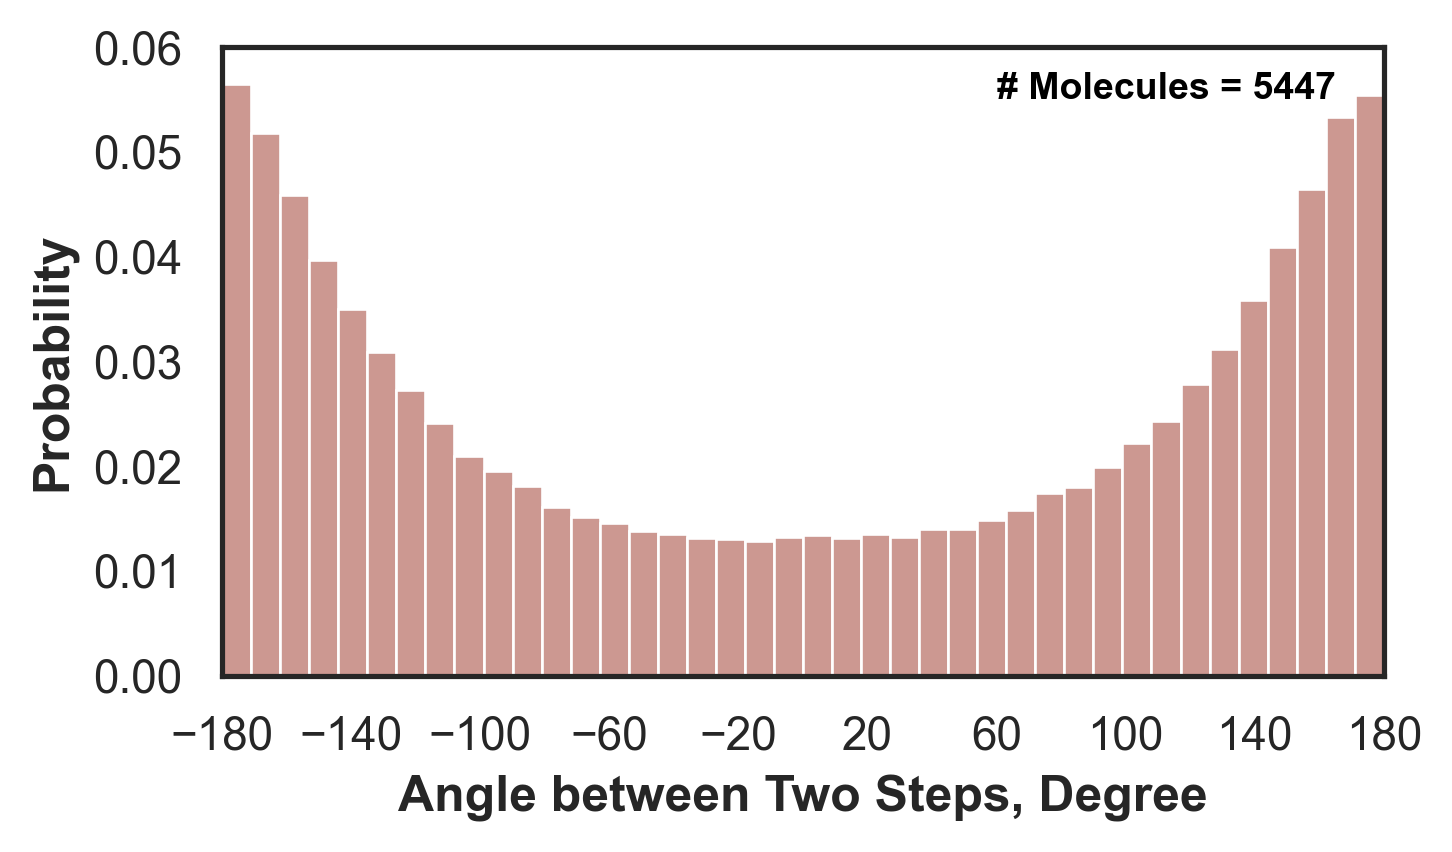

In [6]:
# angle per step distribution constrained
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["alpha"] < 0.5]
data = data[data["alpha"] > 0.2]
data = data.dropna(subset=["list_of_angles"])
lst_angle_arrays = []
for array_like_string in data["list_of_angles"].to_list():
    lst_angle_arrays.append(
        np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
    )
all_angles = np.concatenate(lst_angle_arrays)
df_angles = pd.DataFrame({"angle": all_angles}, dtype=float)
plt.figure(figsize=(5, 3), dpi=300)
sns.histplot(
    data=df_angles,
    x="angle",
    bins=40,
    stat="probability",
    color=color,
    binrange=(-180, 180),
    alpha=0.5,
    lw=3,
)
plt.text(
    60,
    0.055,
    "# Molecules = " + str(data.shape[0]),
    weight="bold",
    color="black",
    fontsize=9,
)
plt.xlabel("Angle between Two Steps, Degree", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.xlim(-180, 180)
plt.ylim(0, 0.06)
bins = np.linspace(-180, 180, 10).astype(int)
plt.xticks(bins)
plt.tight_layout()
plt.savefig("4.1.angle_histo_constrained.png", format="png", bbox_inches="tight")
plt.show()

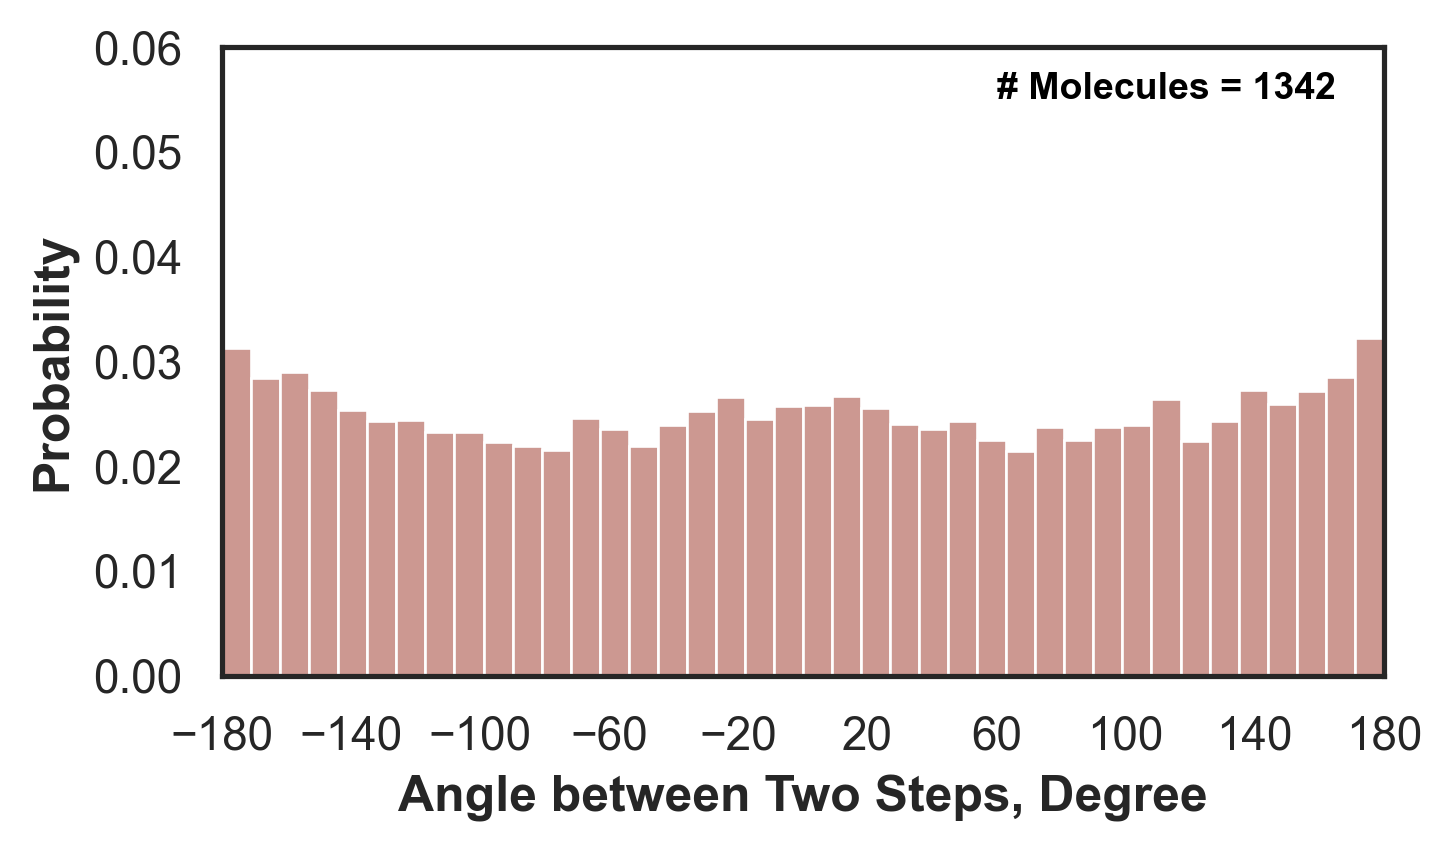

In [7]:
# angle per step distribution mobile
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["alpha"] > 1.1]
data = data.dropna(subset=["list_of_angles"])
lst_angle_arrays = []
for array_like_string in data["list_of_angles"].to_list():
    lst_angle_arrays.append(
        np.fromstring(array_like_string[1:-1], sep=", ", dtype=float)
    )
all_angles = np.concatenate(lst_angle_arrays)
df_angles = pd.DataFrame({"angle": all_angles}, dtype=float)
plt.figure(figsize=(5, 3), dpi=300)
sns.histplot(
    data=df_angles,
    x="angle",
    bins=40,
    stat="probability",
    color=color,
    binrange=(-180, 180),
    alpha=0.5,
    lw=3,
)
plt.text(
    60,
    0.055,
    "# Molecules = " + str(data.shape[0]),
    weight="bold",
    color="black",
    fontsize=9,
)
plt.xlabel("Angle between Two Steps, Degree", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.xlim(-180, 180)
plt.ylim(0, 0.06)
bins = np.linspace(-180, 180, 10).astype(int)
plt.xticks(bins)
plt.tight_layout()
plt.savefig("4.2.angle_histo_mobile.png", format="png", bbox_inches="tight")
plt.show()

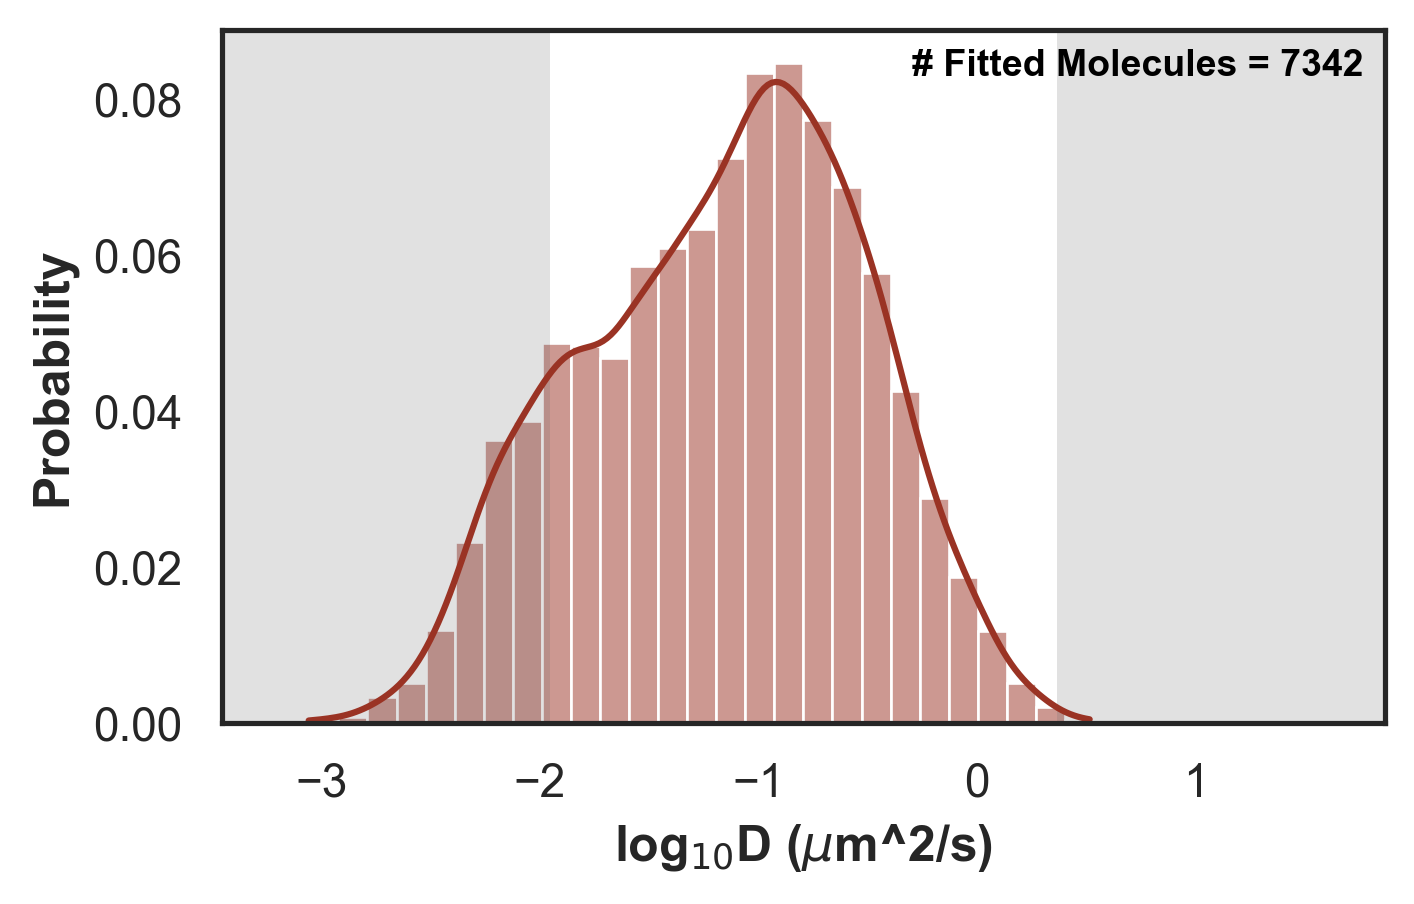

In [12]:
# D distribution among the non contrained molecules
data = df_all[df_all["linear_fit_R2"] > 0.7]
data = data[data["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["alpha"] > 0.5]
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_log10D",
    bins=40,
    stat="probability",
    color=color,
    kde=True,
    binrange=(log10D_low - 1.5, log10D_high + 1.5),
    lw=3,
)
plt.axvspan(
    log10D_low - 1.5, log10D_low, facecolor="dimgray", alpha=0.2, edgecolor="none"
)
plt.axvspan(
    log10D_high, log10D_high + 1.5, facecolor="dimgray", alpha=0.2, edgecolor="none"
)
plt.text(
    -0.3,
    0.083,
    "# Fitted Molecules = " + str(data.shape[0]),
    weight="bold",
    fontsize=9,
    color="black",
)
plt.xlim(log10D_low - 1.5, log10D_high + 1.5)
plt.xlabel(r"log$_{10}$D ($\mu$m^2/s)", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("5.ApparentD_linear_histo.png", format="png", bbox_inches="tight")
plt.show()


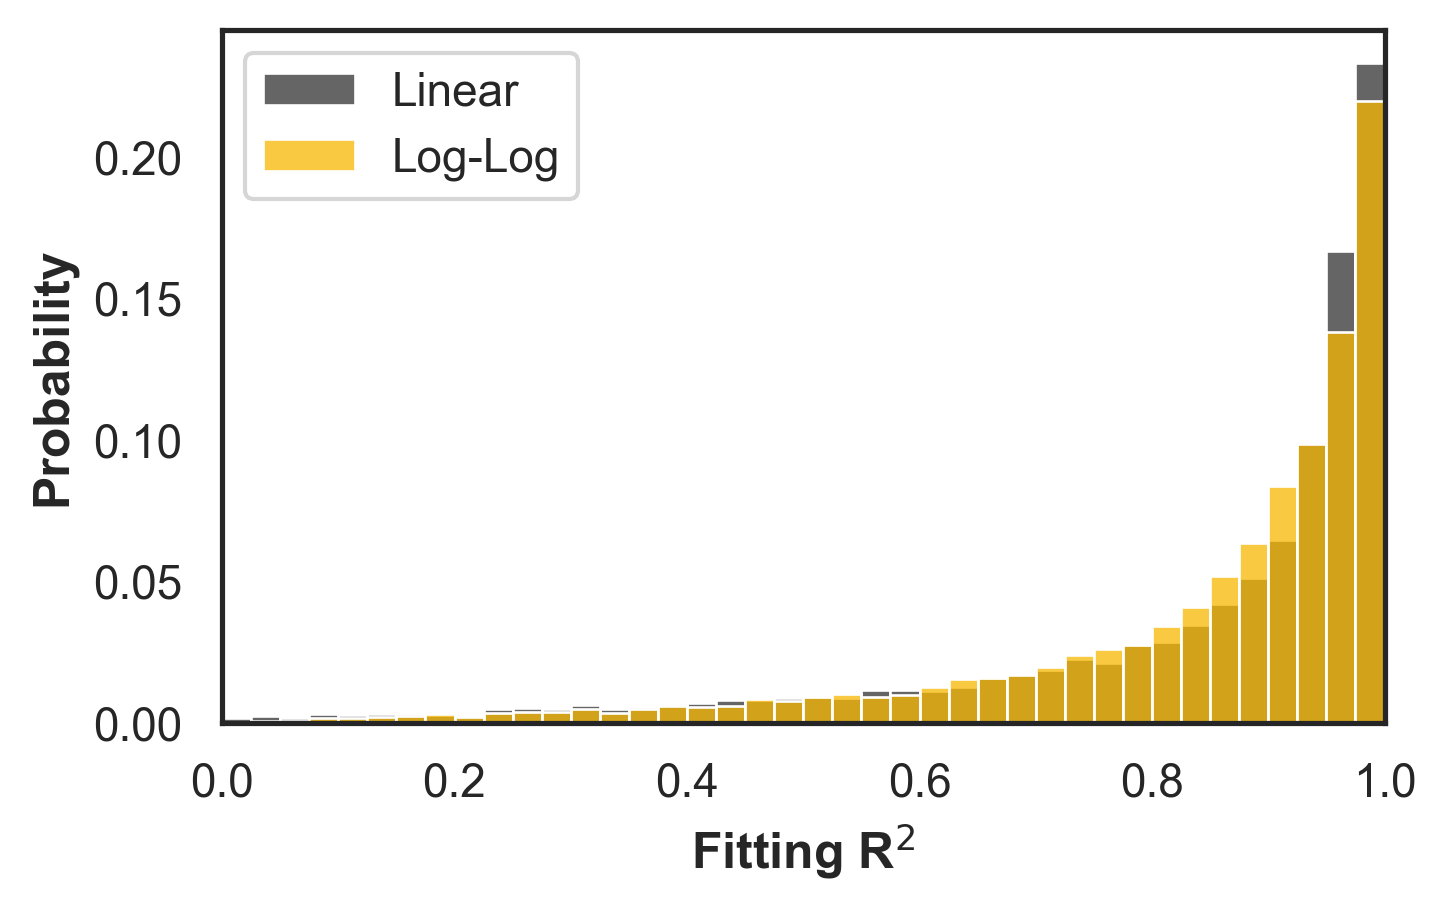

In [9]:
# Fitting R2 of all mobile molecules except alpha < 0.2 bad fitting
data = df_all[df_all["max_d_anytwo_nm"] > threshold_max_d_anytwo_nm]
data = data[data["alpha"] > 0.2]
plt.figure(figsize=(5, 3), dpi=300)
ax = sns.histplot(
    data=data,
    x="linear_fit_R2",
    bins=40,
    stat="probability",
    color="#333232",
    binrange=(0, 1),
    lw=3,
    label="Linear",
)
sns.histplot(
    data=data,
    x="loglog_fit_R2",
    bins=40,
    stat="probability",
    color="#f7b801",
    binrange=(0, 1),
    lw=3,
    label="Log-Log",
    ax=ax,
)
plt.legend()
plt.xlim(0, 1)
plt.xlabel(r"Fitting R$^2$", weight="bold")
plt.ylabel("Probability", weight="bold")
plt.savefig("SM1.fitting_R2_histo.png", format="png", bbox_inches="tight")
plt.show()